# Chemical gas sensor drift compensation


(This project contains deep learning models used in sensor drift compensation problem. We consider the dataset created by "Alexander Vergara, Shankar Vembu, Tuba Ayhan, Margaret A. Ryan, Margie L. Homer, Ramón Huerta,
Chemical gas sensor drift compensation using classifier ensembles, Sensors and Actuators B: Chemical, Volumes 166–167, 2012, Pages 320-329, ISSN 0925-4005,
https://doi.org/10.1016/j.snb.2012.01.074.")

Data are mentioned in (Dong, X.; Han, S.; Wang, A.; Shang, K. Online Inertial Machine Learning for Sensor Array Long-Term Drift Compensation. Chemosensors 2021, 9, 353. https://doi.org/10.3390/chemosensors9120353 ), are placed there: https://github.com/Diaa0/Sensor-Drift-Array-Compensation

(and examples are there too)

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns

from matplotlib import pyplot as plt # import matplotlib.pyplot as plt

import os
import re

path = 'Dataset/'

Example from data_parser.py:

15596.1621
26402.0704


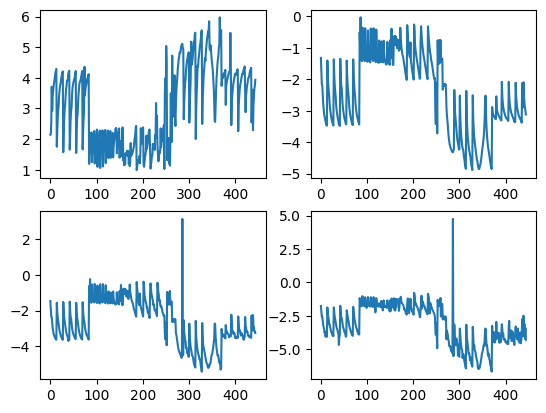

In [6]:
gas_class = []
features_lists = [] 

with open(path + 'batch1.dat', 'r') as file_data:
    for i, line in enumerate(file_data.readlines()):
        gas_class.append(int(line[0]))
        rest = line[1:]
        rest.strip()
        features_lists.insert(i, list(map(float, re.findall('\s\d*:([\d.-]+)', rest))))

for i in range(2):
    #print(gas_class[i])
    print(features_lists[i][0])

gas_class = np.array(gas_class, dtype=np.float32)
features_matrix = np.array(features_lists, dtype=np.float32)
log_features_matrix = np.multiply(np.sign(features_matrix), np.log(np.abs(features_matrix) + 1))


plt.figure()
plt.subplot(2,2,1)
plt.plot(np.multiply(np.sign(features_matrix[:,4]), np.log(np.abs(features_matrix[:, 4]) + 1)))
plt.subplot(2,2,2)
plt.plot(np.multiply(np.sign(features_matrix[:,5]), np.log(np.abs(features_matrix[:, 5]) + 1)))
plt.subplot(2,2,3)
plt.plot(np.multiply(np.sign(features_matrix[:,6]), np.log(np.abs(features_matrix[:, 6]) + 1)))
plt.subplot(2,2,4)
plt.plot(np.multiply(np.sign(features_matrix[:,7]), np.log(np.abs(features_matrix[:, 7]) + 1)))
plt.show()

Try to visualise original data

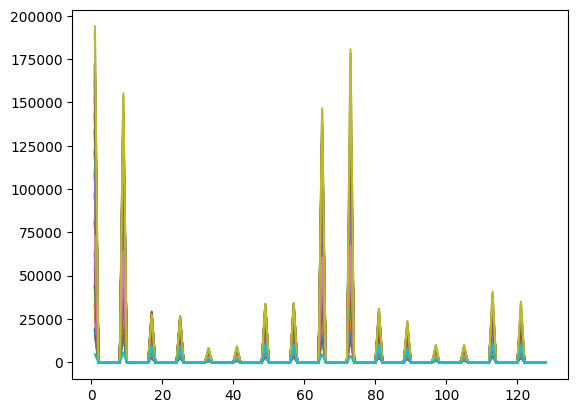

In [22]:
gas_data = []

with open(path + 'batch1.dat', 'r') as file_data:
    for i, line in enumerate(file_data.readlines()):
#        gas_type = int(line[0])
#        rest = line[1:]
        data = line.strip().split(' ') 
        gas_type = int(data[0])
#        print(data)
        # split in pairs by spaces and then split pairs by colons    
        x, y = zip(*[(int(i.strip().split(':')[0]), float(i.strip().split(':')[1])) for i in data[1:]])
        gas_data.append((gas_type, (x, y)))

'''
>>> rr,tt = zip(*[(i*10, i*12) for i in xrange(4)])
>>> rr
(0, 10, 20, 30)
>>> tt
(0, 12, 24, 36)    
'''
plt.figure()

for i in gas_data:
    if i[0] != 1:
        continue
    plt.plot(i[1][0], i[1][1])

plt.show()

Что-то структура данных видимо не такая как показалась.

С огромными числами у нас 1й, 9, 17й и т.д. Всего 16 пиков (потому что 16 сенсоров - https://archive.ics.uci.edu/dataset/270/gas+sensor+array+drift+dataset+at+different+concentrations)

(потому что это не зависимость сигнала от времени, а 8 признаков, см ниже -  Δ𝑅, ‖Δ𝑅‖, 𝑒𝑚𝑎0.001𝐼, 𝑒𝑚𝑎0.01𝐼, 𝑒𝑚𝑎0.1𝐼, 𝑒𝑚𝑎0.001𝐷, 𝑒𝑚𝑎0.01𝐷, and 𝑒𝑚𝑎0.1𝐷)

И в "соседней" папке в тех же файлах еще и концентрация приведена.

В статье (Dong, X.; Han, S.; Wang, A.; Shang, K. Online Inertial Machine Learning for Sensor Array Long-Term Drift Compensation. Chemosensors 2021, 9, 353. https://doi.org/10.3390/chemosensors9120353) пишется, что:

* The dataset is divided into 10 batches by time
* The dataset contains 128 feature vectors focused at two different types of characteristics that leverage the entire dynamic process that occurs at the sensor surface, such as those that reflect the sensor element’s adsorption, desorption, and steady-state respons

The dataset is divided into 10 batches by time, as shown in Table 1.

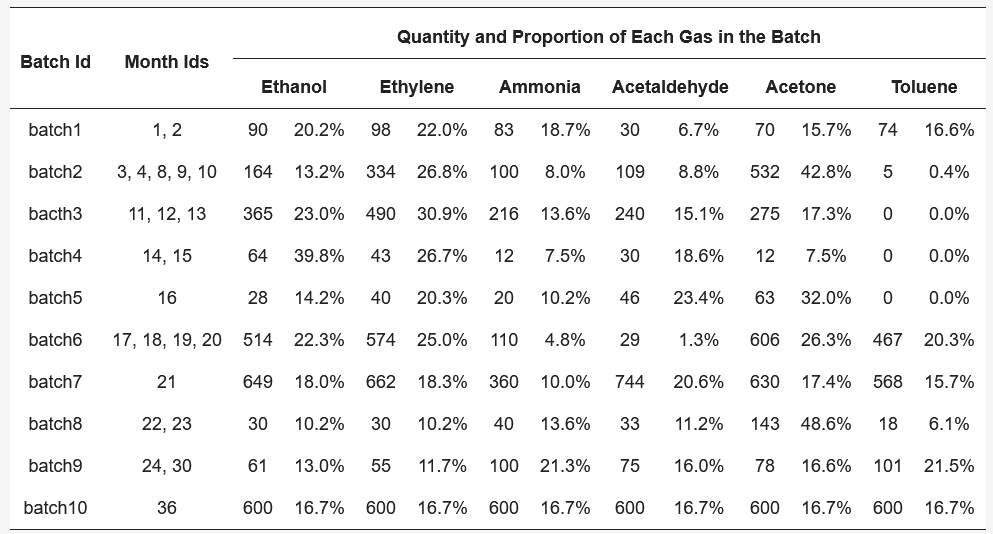

The dataset contains 128 feature vectors, as shown in Table 2. Vergara et al. focused at two different types of characteristics that leverage the entire dynamic process that occurs at the sensor surface, such as those that reflect the sensor element’s adsorption, desorption, and steady-state response [14,15]. 𝑆𝑖 in Table 2 represents the 𝑖th sensor, and each sensor has eight feature vectors, which are Δ𝑅, ‖Δ𝑅‖, 𝑒𝑚𝑎0.001𝐼, 𝑒𝑚𝑎0.01𝐼, 𝑒𝑚𝑎0.1𝐼, 𝑒𝑚𝑎0.001𝐷, 𝑒𝑚𝑎0.01𝐷, and 𝑒𝑚𝑎0.1𝐷, respectively

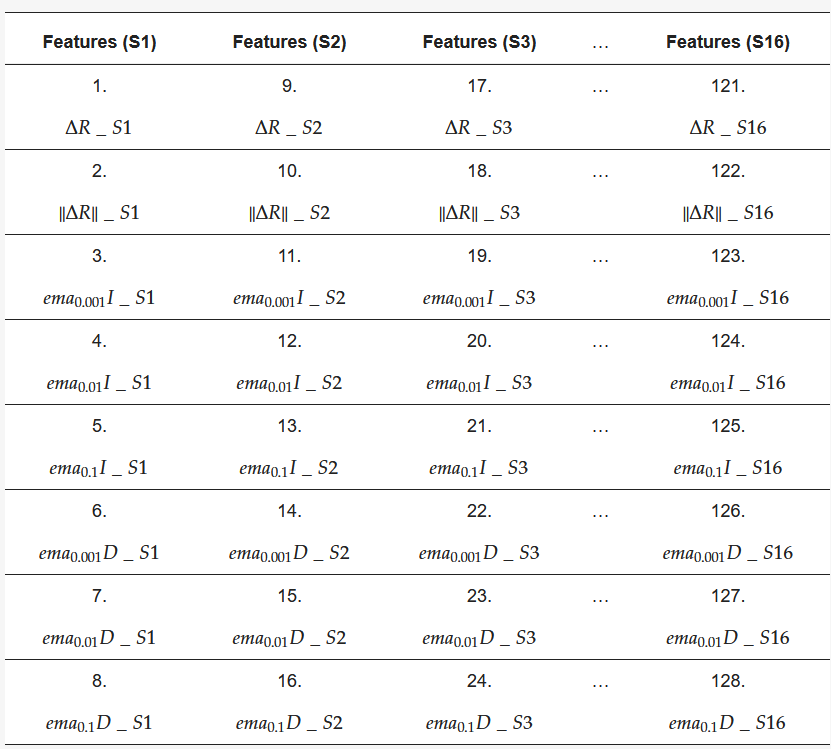

Далее в статье "2.3. Data Cleaning and Normalization"